In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import sample

In [2]:
def readCsv(fileName):
    fullFileName = r'C:\Users\Owner\McGill\4thYear\COMP551\Assignment1\Datasets\Dataset_' + fileName
    df = pd.read_csv(fullFileName, encoding='utf-8', header = None,
                 comment='#', sep=',')
    
    y = df[1].as_matrix()
    y.shape
    return df

In [3]:
def graphData(fileName):
    df = readCsv(fileName)
    plt.figure(figsize=(20,8), dpi=80)
    plt.scatter(df[0], df[1], marker='*')
    plt.show()

In [4]:
# Fill in missing values
def fillMissingValues(df):
    for column in df.columns[5:]:
        avg_CS = df[column].mean()
        std_CS = df[column].std()

        null_count = df[column].isnull().sum()
        
#         to avoid negative numbers in the filled in values
        if avg_CS-std_CS<0:
            CS_null_list = np.random.uniform(0, avg_CS*2, size=null_count)
        else: CS_null_list = np.random.uniform(avg_CS - std_CS, avg_CS + std_CS, size=null_count)
        df[column][np.isnan(df[column])] = CS_null_list
    return df


In [5]:
def sampleTrainingData():
    df = fillMissingValues(readCsv('3_train.csv'))
    train = df.sample(frac=0.8, random_state=200)
    test = df.drop(train.index)

    test.info
    train = train.reset_index()
    test = test.reset_index()

    return (train, test)

In [6]:
def printDf(df):
    with pd.option_context('display.max_rows', 15, 'display.max_columns', 15):
        display(df)

In [7]:
def toCsv(fileName, df):
    
    fullFileName = r'C:\Users\Owner\McGill\4thYear\COMP551\Assignment1\Datasets\Dataset_' + fileName
    df.to_csv(fullFileName, encoding='utf-8', header = None,
                 sep=',')


In [8]:
def dropColumns(df):
    df = df.drop(df.columns[[0,1,2,3,4,5,6]], axis=1)
    df.insert(0,'',1)
    df.columns = [np.arange(0,df.shape[1])]
    return df

In [9]:
from random import randint
def initWArray(df):
    wArray = list()
    for i in range(0, len(df.columns-1)):
#         wArray.append(randint(0,9))
        wArray.append(10)
    return wArray

In [14]:
df = dropColumns(readCsv('3_test_train.csv'))
printDf(df)
len(df.columns)
# for i in range(0,len(df.columns)-1):
#     print(i)
print(df[123][0])
# df.columns = [np.arange(0,df.shape[1])]
# df.loc[:, 0] = pd.Series(1, index=df.index)
# printDf(df)


,0,1,2,3,4,5,6,...,117,118,119,120,121,122,123
0,1,0.01,0.61,1.00,0.00,0.01,0.01,...,0.233623,0.076100,0.533575,0.839956,0.00,0.126027,0.32
1,1,0.00,0.59,0.03,0.96,0.05,0.04,...,0.095845,0.115273,0.633781,0.728114,0.00,0.031549,0.04
2,1,0.01,0.45,0.03,0.97,0.04,0.01,...,0.210526,0.078712,0.897452,0.674998,0.00,0.242509,0.09
3,1,0.16,0.76,0.06,0.31,0.50,0.94,...,0.040000,0.030000,0.910000,0.500000,0.86,0.110000,0.50
4,1,0.00,0.93,0.04,0.42,0.01,1.00,...,0.062685,0.145775,0.905791,0.093577,0.00,0.212851,0.17
5,1,0.15,0.36,0.41,0.64,0.05,0.06,...,0.110000,0.030000,0.700000,0.500000,1.00,0.120000,0.45
6,1,0.06,0.51,0.47,0.61,0.03,0.03,...,0.132957,0.123031,0.782543,0.043104,0.00,0.311747,0.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1588,1,0.01,0.42,0.76,0.39,0.06,0.00,...,0.041355,0.045713,0.609567,0.805533,0.00,0.039235,0.16
1589,1,0.00,0.36,0.03,0.94,0.02,0.14,...,0.139244,0.123638,0.908043,0.275665,0.00,0.305255,0.09


0.32


In [32]:
def repeatUntilConvergence(learningRate):
    df = dropColumns(readCsv('3_test_train.csv'))
    
    print('Learning rate: ', learningRate)
    #number of epochs
    MSEArrayTraining = list()
    MSEArrayValidation = list()
    epochs = np.linspace(0, 9, 10)
    wArray = initWArray(dropColumns(readCsv('3_test_train.csv')))
    print('DF0', len(df[0]))
    print('DF Columns', len(df.columns)-1)
    print('DFIloc', len(df.iloc[1500]))
    print('wArray', len(wArray))
    MSEArrayTraining = list()
    
    for i in epochs:
        print('Epoch', i)
        #number of rows in the dataset
        for j in range(1, len(df[0])):
            for k in range(0, len(df.columns)-1):
                wArray[k] = wArray[k] - learningRate*(np.dot(wArray, df.iloc[k])-df[123][j])*df[k][j]
#                 print(wArray)
#             w0 = w0 - learningRate*(w0+w1*df[0][j]-df[1][j])
#             w1 = w1 - learningRate*(w0+w1*df[0][j]-df[1][j])*df[0][j]
        MSEArrayTraining.append(MSE(wArray, df))
    
    #Now given that the epoch ran once, make a prediction for y and calculate MSE.  Then train for next epoch.  
#         wEq = np.poly1d(wArray[::-1])
#         print(MSE(wEq))
#         MSEArrayTraining.append(MSE(wEq, readCsv('2_train.csv')))
#         MSEArrayValidation.append(MSE(wEq, readCsv('2_valid.csv')))

    return (epochs, MSEArrayTraining)
#     
#     return (epochs, MSEArrayTraining, MSEArrayValidation)

    #We want to minimize this MSE
    #Plot training and validation MSE for every epoch  
# wArray, df = repeatUntilConvergence(0.1)
# print('MSE: ', MSE(wArray, df))

In [33]:
def MSE(wArray, df):
    MSE = 0
    for i in range(0, len(df[0])):
        MSE = MSE + (np.dot(wArray, df.iloc[i])-df[123][i])**2
    MSE = MSE/len(df[0])
    return MSE

Learning rate:  1e-06
DF0 1595
DF Columns 123
DFIloc 124
wArray 124
Epoch 0.0
Epoch 1.0
Epoch 2.0
Epoch 3.0
Epoch 4.0
Epoch 5.0
Epoch 6.0
Epoch 7.0
Epoch 8.0
Epoch 9.0


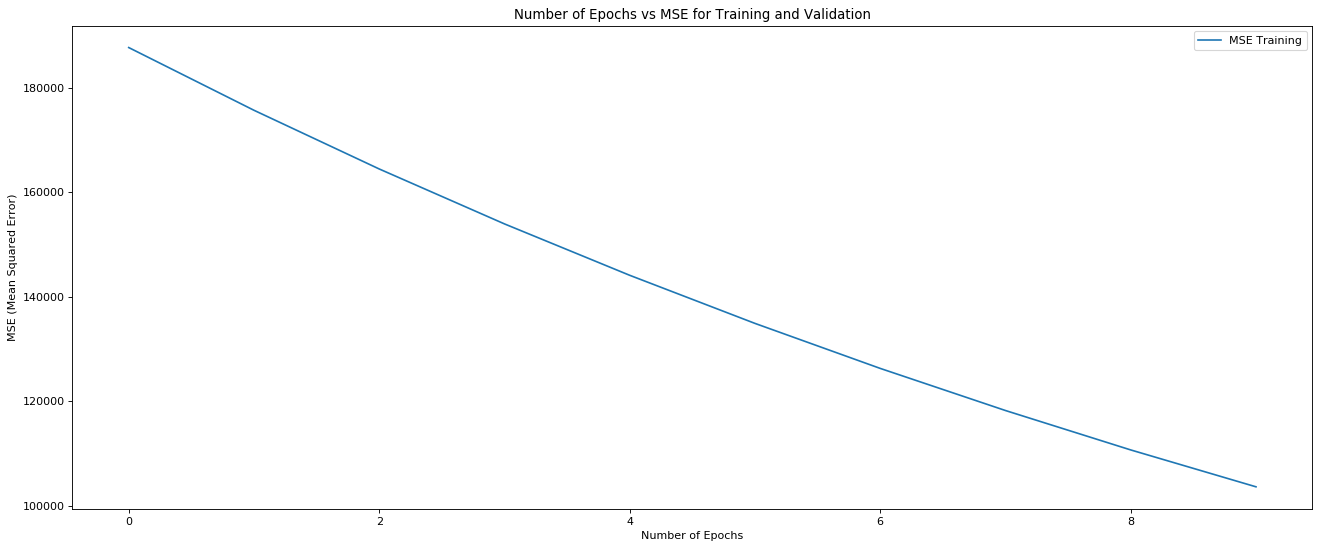

In [34]:
def plotMSE(epochs, MSETrain):
    plt.figure(figsize=(20,8), dpi = 80)
    trainingPlot = plt.plot(epochs,  MSETrain, '-', label = 'MSE Training')
#     validationPlot = plt.plot(epochs,  MSEValid, '--', label = 'MSE Validation')
    plt.legend(loc=1)
    plt.xlabel('Number of Epochs')
    plt.ylabel('MSE (Mean Squared Error)')
    plt.title('Number of Epochs vs MSE for Training and Validation')
    plt.show()
epochs, MSETrain = repeatUntilConvergence(10**(-6))
plotMSE(epochs, MSETrain)

In [28]:
len(MSETrain)

1